In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
import datetime

In [3]:
chernobyl_coords = (30.0927, 51.3870) # (Lon, lat) or (x, y)

MAP_SIZE_IN_DEGREES = (100, 50)

LOWER_LEFT_X_LON = chernobyl_coords[0] - MAP_SIZE_IN_DEGREES[0]/2
LOWER_LEFT_Y_LAT = chernobyl_coords[1] - MAP_SIZE_IN_DEGREES[1]/2
UPPER_LEFT_X_LON = chernobyl_coords[0] + MAP_SIZE_IN_DEGREES[0]/2
UPPER_LEFT_Y_LAT = chernobyl_coords[1] + MAP_SIZE_IN_DEGREES[1]/2



# Display Chernobyl Location

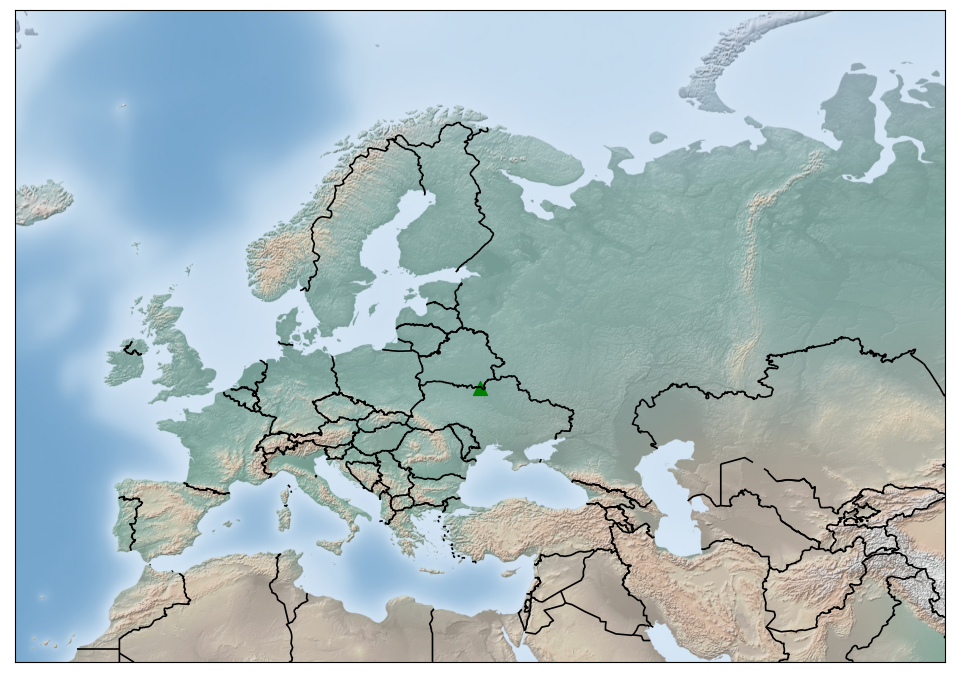

In [53]:
fig = plt.figure(figsize=(12,9))

# world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
m = Basemap(projection='mill',
            llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
            llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
            urcrnrlon=UPPER_LEFT_X_LON, 
            urcrnrlat=UPPER_LEFT_Y_LAT,
            resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

m.shadedrelief() # makes it look pretty :)
m.drawcountries(linewidth=1.2)

# Locate Chernobyl
m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='green', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

plt.show()

# Get Sensor Locations

In [4]:
sensor_latitudes = []
sensor_longitudes = []

data = pd.read_csv("data/cleaned.csv")

for lon, lat in data.filter(['X','Y']).drop_duplicates().values:
    print(lon, lat)
    sensor_longitudes.append(lon)
    sensor_latitudes.append(lat)


assert len(sensor_latitudes) == len(sensor_longitudes) and len(sensor_latitudes) > 50

12.07 55.7
6.1 50.76
10.59 49.3
13.42 52.5
12.78 49.2
7.87 48.0
9.95 51.53
9.73 52.38
8.67 49.0
7.65 51.11
11.58 48.13
7.15 53.71
8.77 50.1
8.94 48.46
11.34 48.0
10.75 52.81
5.75 43.71
0.25 47.15
4.81 50.1
4.8 44.63
2.51 47.71
7.56 47.91
-1.9 49.55
2.31 51.0
5.72 45.18
5.26 45.8
2.13 48.88
4.8 44.13
7.42 43.73
2.18 48.68
2.36 48.85
2.16 48.73
4.75 45.4
1.58 47.71
4.73 44.33
5.38 49.15
-6.28 53.37
11.33 44.48
12.3 42.03
8.63 45.8
8.02 45.21
16.63 40.17
5.18 52.11
4.38 52.0
6.56 53.13
6.53 53.25
4.64 52.76
3.58 51.45
23.78 38.0
21.79 40.31
22.95 40.59
-2.45 51.69
-3.61 55.06
-4.49 56.0
-4.83 56.0
-1.3 51.62
4.33 50.78
5.12 51.18
-0.4 39.48
0.0 0.0
7.12 46.49
8.48 46.15
7.42 46.42
9.78 47.51
15.36 47.08
11.41 47.28
14.33 46.63
14.3 48.31
13.05 47.9
16.36 48.21
25.0 60.13
24.7 60.45
10.66 59.9
9.8 59.9
12.0 57.75
13.92 56.82
14.67 63.17
18.08 59.33
20.25 63.83
48.73 19.17
48.17 17.17
48.97 14.43
50.22 15.83
48.5 17.45
21.25 48.73
49.08 16.33
50.08 14.42
50.0 14.42
50.68 14.0
19.1 47.5


# Display Sensor Locations

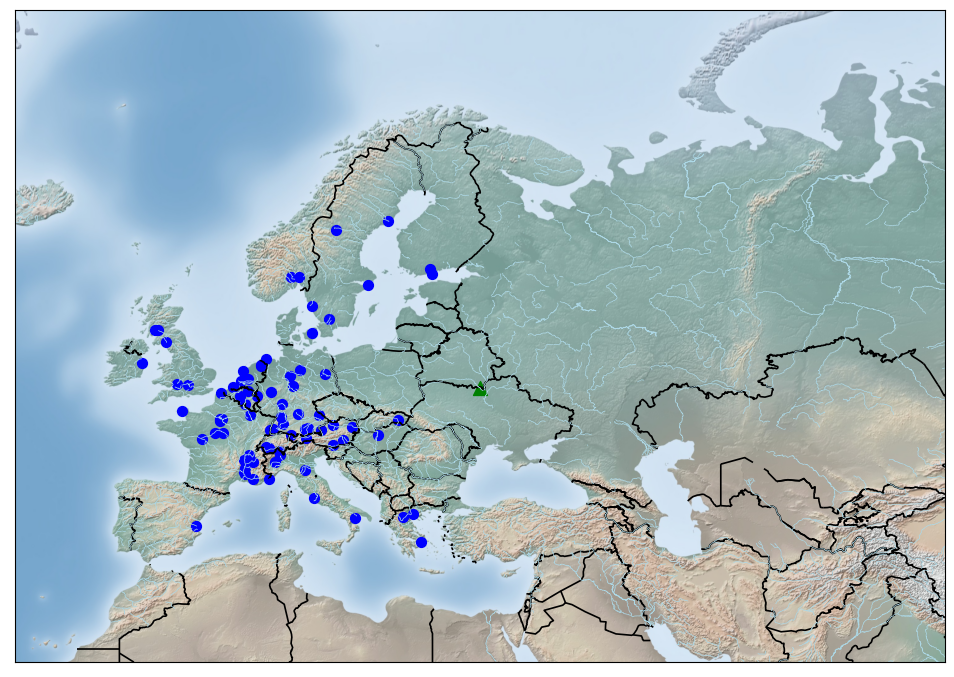

In [55]:
fig = plt.figure(figsize=(12,9))

# world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
m = Basemap(projection='mill',
            llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
            llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
            urcrnrlon=UPPER_LEFT_X_LON, 
            urcrnrlat=UPPER_LEFT_Y_LAT,
            resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

m.shadedrelief() # makes it look pretty :)
m.drawcountries(linewidth=1.2)
m.drawrivers(color="lightblue")

# Locate Chernobyl
m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='green', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

#Locate Each Sensor:
m.scatter(sensor_longitudes, sensor_latitudes, latlon=True, s=50, c='blue', marker='o', alpha=1) 



plt.show()

# Interactive Map

In [5]:
colorbar = {
    'I_131_(Bq/m3)':{
        'min':0,
        'max':0
    },
    'Cs_134_(Bq/m3)':{
        'min':0,
        'max':0
    },
    'Cs_137_(Bq/m3)':{
        'min':0,
        'max':0
    },
}
v=[]
for lon, lat, value in data.filter(['X','Y', "I_131_(Bq/m3)"]).drop_duplicates().values:
    v.append(value)
colorbar['I_131_(Bq/m3)']['min'] = min(v)
colorbar['I_131_(Bq/m3)']['max'] = max(v)

v=[]
for lon, lat, value in data.filter(['X','Y', "Cs_134_(Bq/m3)"]).drop_duplicates().values:
    v.append(value)
colorbar['Cs_134_(Bq/m3)']['min'] = min(v)
colorbar['Cs_134_(Bq/m3)']['max'] = max(v)

v=[]
for lon, lat, value in data.filter(['X','Y', "Cs_137_(Bq/m3)"]).drop_duplicates().values:
    v.append(value)
colorbar['Cs_137_(Bq/m3)']['min'] = min(v)
colorbar['Cs_137_(Bq/m3)']['max'] = max(v)

In [6]:
def create_map(date, iso_widget, CREATE_PICS=False):
    sensor_latitudes = []
    sensor_longitudes = []
    iso_values = []

    if date.day >=10:
        strdate = f"{date.year}-0{date.month}-{date.day}"
    else:
        strdate = f"{date.year}-0{date.month}-0{date.day}"

    for lon, lat, value in data[data.date == strdate].filter(['X','Y', iso_widget]).drop_duplicates().values:
        sensor_longitudes.append(lon)
        sensor_latitudes.append(lat)
        iso_values.append(float(value))
        

    
    fig = plt.figure(figsize=(12,9))

    # world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
    m = Basemap(projection='mill',
                llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
                llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
                urcrnrlon=UPPER_LEFT_X_LON,
                urcrnrlat=UPPER_LEFT_Y_LAT,
                resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

    m.shadedrelief() # makes it look pretty :)

    # Locate Chernobyl
    m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='green', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

    #Locate Each Sensor:
    sc = m.scatter(sensor_longitudes, sensor_latitudes, latlon=True, s=100, c=iso_values, cmap='hot', marker='o', alpha=1, vmin=colorbar[iso_widget]['min'], vmax=colorbar[iso_widget]['max']) 
    
    fig.colorbar(sc)
    plt.title(f"{date.month}-{date.day}-1986       {iso_widget}")
    if CREATE_PICS: 
        if iso_widget == "I_131_(Bq/m3)":
            fig.savefig(f'img/I131/{date.month}-{date.day}_I131.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_134_(Bq/m3)":
            fig.savefig(f'img/Cs134/{date.month}-{date.day}_Cs134.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_137_(Bq/m3)":
            fig.savefig(f'img/Cs137/{date.month}-{date.day}_Cs137.jpg',bbox_inches='tight',transparent=True, pad_inches=0)

        plt.close()
    else: plt.show()
    

In [68]:
date_widget = widgets.DatePicker()
date_widget.value = datetime.date(1986, 4, 27)

iso_widget = widgets.Dropdown(
    options=['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)'],
    value='I_131_(Bq/m3)',
    description='Isotope:',
    disabled=False
)
ui = widgets.VBox([widgets.HBox([date_widget, iso_widget])])
out = widgets.interactive_output(create_map, {'date': date_widget, 'iso_widget': iso_widget})
display(ui, out)

Output()

# Interactive Map: Transparency

In [7]:
def create_map_transparency(date, iso_widget, CREATE_PICS=False):
    sensor_latitudes = []
    sensor_longitudes = []
    iso_values = []


    if date.day >=10:
        strdate = f"{date.year}-0{date.month}-{date.day}"
    else:
        strdate = f"{date.year}-0{date.month}-0{date.day}"

    for lon, lat, value in data[data.date == strdate].filter(['X','Y', iso_widget]).drop_duplicates().values:
        sensor_longitudes.append(lon)
        sensor_latitudes.append(lat)
        iso_values.append(float(value))
    fig = plt.figure(figsize=(12,9))

    # world map has a lower left corner of (-180, -90) and an upper right corner of (180, 90)
    m = Basemap(projection='mill',
                llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
                llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
                urcrnrlon=UPPER_LEFT_X_LON,
                urcrnrlat=UPPER_LEFT_Y_LAT,
                resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

    m.shadedrelief() # makes it look pretty :)

    # Locate Chernobyl
    m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='green', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

    alph = np.array(iso_values)/colorbar[iso_widget]['max']
    #Locate Each Sensor:
    # sc = m.scatter(sensor_longitudes, sensor_latitudes, latlon=True, s=50, c=iso_values, cmap='hot', marker='o', alpha=1, vmin=colorbar[iso_widget]['min'], vmax=colorbar[iso_widget]['max']) 
    sc = m.scatter(sensor_longitudes, sensor_latitudes, latlon=True, s=50, c='red', marker='o', alpha=alph) 
    
    # fig.colorbar(sc)
    if CREATE_PICS: 
        plt.title(f"{date.month}-{date.day}-1986       {iso_widget}")
        if iso_widget == "I_131_(Bq/m3)":
            fig.savefig(f'img/I131-trans/{date.month}-{date.day}_I131.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_134_(Bq/m3)":
            fig.savefig(f'img/Cs134-trans/{date.month}-{date.day}_Cs134.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_137_(Bq/m3)":
            fig.savefig(f'img/Cs137-trans/{date.month}-{date.day}_Cs137.jpg',bbox_inches='tight',transparent=True, pad_inches=0)

        plt.close()
    else: plt.show()
    

In [64]:
date_widget = widgets.DatePicker()
date_widget.value = datetime.date(1986, 4, 27)

iso_widget = widgets.Dropdown(
    options=['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)'],
    value='I_131_(Bq/m3)',
    description='Isotope:',
    disabled=False
)
ui = widgets.VBox([widgets.HBox([date_widget, iso_widget])])
out = widgets.interactive_output(create_map_transparency, {'date': date_widget, 'iso_widget': iso_widget})
display(ui, out)

Output()

# Make Images

In [71]:
isotopes = ["I_131_(Bq/m3)", "Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]

numdays = (datetime.date(1986, 6, 1) - datetime.date(1986, 4, 27)).days
base = datetime.date(1986, 4, 27)
date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]

# date_list = [datetime.date(1986, 4, 27)]

for isotope in isotopes:
    for date in date_list:
        create_map_transparency(date,isotope,CREATE_PICS=True)
        create_map(date,isotope,CREATE_PICS=True)

print("Done")

Done


# Wind Arrows

In [8]:
def generate_arrow(map, destlon, destlat, date):
    chernobylStartDate = datetime.date(1986, 4, 26)
    numDays = (date - chernobylStartDate).days

    dist_x = destlon - chernobyl_coords[0]
    dist_y = destlat - chernobyl_coords[1]

    arrow_coords = []

    start_x = chernobyl_coords[0]
    start_y = chernobyl_coords[1]

    for _ in range(numDays):
        next_x = start_x + (dist_x / numDays)
        next_y = start_y + (dist_y / numDays)
        x, y = map(start_x, start_y)
        nx, ny = map(next_x, next_y)
        dx = nx - x
        dy = ny - y
        arrow_coords.append([x, y, dx, dy])
        start_x = next_x
        start_y = next_y

    return arrow_coords


In [31]:
def create_map_wind(displaydate, iso_widget, CREATE_PICS=False):
    fig = plt.figure(figsize=(20,20))
    m = Basemap(projection='mill',
                    llcrnrlon=LOWER_LEFT_X_LON, # X axis for map is longitude
                    llcrnrlat=LOWER_LEFT_Y_LAT, # Y axis for map is latitude
                    urcrnrlon=UPPER_LEFT_X_LON,
                    urcrnrlat=UPPER_LEFT_Y_LAT,
                    resolution="i") # c-crude, l-low, i-intermediate, h-high, f-full

    m.shadedrelief() # makes it look pretty :)

    # Locate Chernobyl
    m.scatter(chernobyl_coords[0], chernobyl_coords[1], latlon=True, s=100, c='green', marker='^', alpha=1) # puts a red triangle at the (lon,lat) coordinate

    arrows = []


    for lon, lat, date, value in data.filter(['X','Y', 'date', iso_widget]).values:
        if float(value) < 1.5:
            continue
        s_year, s_month, s_day = date.split('-')
        arrow_path = generate_arrow(m, float(lon), float(lat), datetime.date(int(s_year), int(s_month), int(s_day)))
        arrows.append(arrow_path)

    if iso_widget == "I_131_(Bq/m3)":
        c = 'yellow'
    elif iso_widget == 'Cs_134_(Bq/m3)':
        c = 'blue'
    else:
        c = 'red'

    numdaysFromStart = (displaydate - datetime.date(1986,4,27)).days
    for arrow in arrows:
        if len(arrow) > numdaysFromStart:
            plt.arrow(
            x = arrow[numdaysFromStart][0],
            y = arrow[numdaysFromStart][1],
            dx = arrow[numdaysFromStart][2],
            dy = arrow[numdaysFromStart][3],
            head_width=100000, 
            head_length=100000,
            facecolor=c,
            length_includes_head=True
                        )
            
    if CREATE_PICS: 
        plt.title(f"{displaydate.month}-{displaydate.day}-1986       {iso_widget}")
        if iso_widget == "I_131_(Bq/m3)":
            fig.savefig(f'img/I131-wind/{displaydate.month}-{displaydate.day}_I131.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_134_(Bq/m3)":
            fig.savefig(f'img/Cs134-wind/{displaydate.month}-{displaydate.day}_Cs134.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
        if iso_widget == "Cs_137_(Bq/m3)":
            fig.savefig(f'img/Cs137-wind/{displaydate.month}-{displaydate.day}_Cs137.jpg',bbox_inches='tight',transparent=True, pad_inches=0)

        plt.close()
    else: plt.show()



In [27]:
date_widget = widgets.DatePicker()
date_widget.value = datetime.date(1986, 4, 27)

iso_widget = widgets.Dropdown(
    options=['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)'],
    value='I_131_(Bq/m3)',
    description='Isotope:',
    disabled=False
)
ui = widgets.VBox([widgets.HBox([date_widget, iso_widget])])
out = widgets.interactive_output(create_map_wind, {'displaydate': date_widget, 'iso_widget': iso_widget})
display(ui, out)

Output()

In [32]:
isotopes = ["I_131_(Bq/m3)", "Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]

numdays = (datetime.date(1986, 6, 1) - datetime.date(1986, 4, 27)).days
base = datetime.date(1986, 4, 27)
date_list = [base + datetime.timedelta(days=x) for x in range(numdays)]

# date_list = [datetime.date(1986, 4, 27)]

for isotope in isotopes:
    for date in date_list:
        create_map_wind(date,isotope,CREATE_PICS=True)

print("Done")

Done
